In [1]:
from glob import glob
from framed import load_cbmodel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from framed.io.sbml import sanitize_id
from scipy.stats import pearsonr
import os.path
import seaborn as sns
from carveme import project_dir
import cobra


In [2]:
sns.set_style('white')
sns.set_palette('deep')

### Load models

In [3]:

files = r"data\\vhs models\\*.xml"
prefix, suffix = files.split('*')
models = {x[len(prefix):-len(suffix)]: cobra.io.read_sbml_model(x)
          for x in glob(files)} 

# Model description

In [5]:
stats={}

for name, model in models.items():
    
    genes=len(model.genes)
    reactions=len(model.reactions)
    metabolites=len(model.metabolites)
    stats[name] = (genes,reactions,metabolites)
df = pd.DataFrame(stats, index=['genes', 'reactions', 'metabolites']).T

C:\Users\pau.perezescriva\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1667: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pau.perezescriva\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 100 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\pau.perezescriva\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 100 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


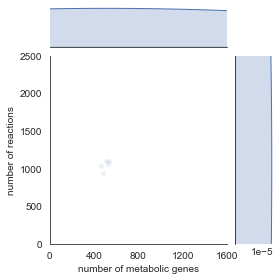

In [6]:
g = sns.JointGrid(x='genes', y='reactions', data=df, ratio=4, size=4, xlim=(0,1600), ylim=(0,2500))
g = g.plot_joint(plt.scatter, color=sns.color_palette()[0], alpha=0.1, s=25, edgecolor="white", linewidth=0.5)
g = g.plot_marginals(sns.kdeplot, shade=True, bw=100)
g.ax_marg_x.axes.grid(False)
g.ax_marg_y.axes.grid(False)
g.ax_joint.set_xlabel('number of metabolic genes')
g.ax_joint.set_ylabel('number of reactions')
g.ax_joint.set_xticks([0, 400, 800, 1200, 1600])

C:\Users\pau.perezescriva\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1667: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pau.perezescriva\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 100 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\pau.perezescriva\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 100 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(2.5, 0.5, 'number of metabolites')

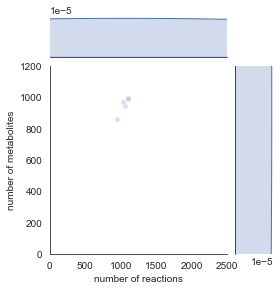

In [7]:
g = sns.JointGrid(x='reactions', y='metabolites', data=df, ratio=4, size=4, xlim=(0,2500), ylim=(0,1200))
g = g.plot_joint(plt.scatter, color=sns.color_palette()[0],
                 alpha=0.2, s=25, edgecolor="white", linewidth=0.5)
g = g.plot_marginals(sns.kdeplot, shade=True, bw=100, color=sns.color_palette('deep')[0])
g.ax_marg_x.axes.grid(False)
g.ax_marg_y.axes.grid(False)
g.ax_joint.set_xlabel('number of reactions')
g.ax_joint.set_ylabel('number of metabolites')

C:\Users\pau.perezescriva\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1667: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pau.perezescriva\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 100 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\pau.perezescriva\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 100 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


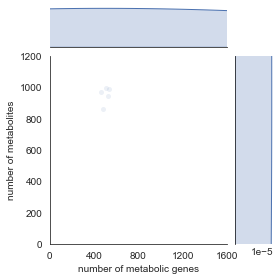

In [8]:
g = sns.JointGrid(x='genes', y='metabolites', data=df, ratio=4, size=4, xlim=(0,1600), ylim=(0,1200))
g = g.plot_joint(plt.scatter, color=sns.color_palette()[0], alpha=0.1, s=25, edgecolor="white", linewidth=0.5)
g = g.plot_marginals(sns.kdeplot, shade=True, bw=100)
g.ax_marg_x.axes.grid(False)
g.ax_marg_y.axes.grid(False)
g.ax_joint.set_xlabel('number of metabolic genes')
g.ax_joint.set_ylabel('number of metabolites')
g.ax_joint.set_xticks([0, 400, 800, 1200, 1600])


## We observe a clear correlation between genes, metabolites and reactions

In [9]:
organisms = ['F. nucleatum', 'G. morbillorum', 'P. gingivalis',
             'C. jejuni', 'P. stomatis']

vhs = {
    'F. nucleatum': r"data\\vhs models\\Fn_vhs.xml",
    'G. morbillorum': r"data\\vhs models\\Gm_vhs.xml",
    'P. gingivalis': r"data\\vhs models\\Pg_vhs.xml",
    'C. jejuni': r"data\\vhs models\\Cj_vhs.xml",
    'P. stomatis': r"data\\vhs models\\Ps_vhs.xml"
}

carveme = {
    'F. nucleatum': r"data\\carveme_models\\Fn_carveme.xml",
    'G. morbillorum': r"data\\carveme_models\\Gm_carveme.xml",
    'P. gingivalis': r"data\\carveme_models\\Pg_carveme.xml",
    'C. jejuni': r"data\\carveme_models\\Cj_carveme.xml",
    'P. stomatis': r"data\\carveme_models\\Ps_carveme.xml"
}
for label, model_file in vhs.items():
    vhs[label] =  cobra.io.read_sbml_model(model_file)

for label, model_file in carveme.items():
    carveme[label] =  cobra.io.read_sbml_model(model_file)

In [10]:
data = []
spontaneous = {'G_spontaneous', 'G_Unknown', 'G_s0001', 'G_NoAssignment'} 
for organism in organisms:
    
    model = vhs[organism]
    n_genes = len(set(model.genes) - spontaneous)
    n_rxns = len([x for x in model.reactions if not x.name.startswith('R_EX_')])
    
    n_mets = len(model.metabolites)
    data.append((organism, 'Agora', n_genes, n_rxns, n_mets))
    
    model = carveme[organism]
    n_genes = len(set(model.genes) - spontaneous)
    n_rxns = len([x for x in model.reactions if not x.name.startswith('R_EX_')])
    
    n_mets = len(model.metabolites)
    data.append((organism, 'CarveMe', n_genes, n_rxns, n_mets))
df = pd.DataFrame(data, columns=['Organism', 'Source', 'Genes', 'Reactions', 'Metabolites'])

C:\Users\pau.perezescriva\AppData\Local\Temp\ipykernel_28108\8227644.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax1.legend(legend_text, bbox_to_anchor=(1.05, 1.5), ncol=3, handles=legend_handles)


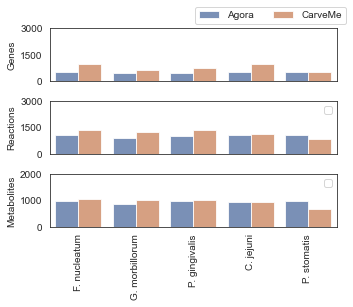

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(5, 4.5))

sns.barplot(x="Organism", y="Genes", hue="Source", data=df, palette='deep', ax=ax1, alpha=0.8)
ax1.set_ylim(0, 3000)
ax1.set_yticks([0, 1500, 3000])
ax1.set_xlabel('')
legend_handles, legend_text = ax1.get_legend_handles_labels()
ax1.legend(legend_text, bbox_to_anchor=(1.05, 1.5), ncol=3, handles=legend_handles)


sns.barplot(x="Organism", y="Reactions", hue="Source", data=df, palette='deep', ax=ax2, alpha=0.8)
ax2.set_ylim(0, 3000)
ax2.set_yticks([0, 1500, 3000])
ax2.get_legend().set_title('')
ax2.set_xlabel('')
ax2.legend([])

res = sns.barplot(x="Organism", y="Metabolites", hue="Source", data=df, palette='deep', ax=ax3, alpha=0.8)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_ylim(0, 2000)
ax3.set_yticks([0, 1000, 2000])
ax3.set_xlabel('')
ax3.legend([])

plt.tight_layout()
plt.savefig(r"results\\summary_carveme_vs_agora.png", dpi=300, bbox_inches='tight')

###  Although major differences are observed at the Gene level speciallz for CarveMe giving higher number of genes, we see that this is not reallz translated to the number of metabolites

How well do this models work when they are not constrained? We used the true data obtained from Agora as absolute truth, as see which ones are correctly predicted by the two types of models

In [12]:
agora_paper_data = pd.read_excel(r"data\agora_metabolites_info.xlsx")

In [13]:
agora_paper_data

,Organism,Exchange Agora,Exchange CarveMe,Direction,AGORA2,KBase,BiGG,CarveMe,gapseq,MAGMA
0,G. morbillorum,EX_ac(e),EX_ac_e,Secretion,TP,FN,NaN,FN,NaN,NaN
1,G. morbillorum,EX_etoh(e),EX_etho_e,Secretion,TP,FN,NaN,FN,NaN,NaN
2,G. morbillorum,EX_for(e),EX_for_e,Secretion,TP,TP,NaN,FN,NaN,NaN
3,G. morbillorum,EX_lac_L(e),EX_lac__L_e,Secretion,TP,TP,NaN,TP,NaN,NaN
4,G. morbillorum,EX_nh4(e),EX_nh4_e,Secretion,TP,FN,NaN,TP,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
61,C. jejuni,EX_15dap(e),EX_15dap_e,Secretion,FN,FN,NaN,FN,NaN,NaN
62,C. jejuni,EX_ptrc(e),EX_ptrc_e,Secretion,TP,FN,NaN,FN,NaN,NaN
63,C. jejuni,EX_spmd(e),EX_spmd_e,Secretion,FN,FN,NaN,TP,NaN,NaN
64,C. jejuni,EX_sprm(e),EX_sprm_e,Secretion,FN,FN,NaN,FN,NaN,NaN


In [14]:
vhs_frames={}
for bacteria in vhs.keys():
    solution = vhs[bacteria].optimize().to_frame()
    s = solution[solution.index.str.contains("EX_")]
    vhs_frames[bacteria] = s[s.fluxes>0]
carveme_frames={}
for bacteria in vhs.keys():
    solution = carveme[bacteria].optimize().to_frame()
    s = solution[solution.index.str.contains("EX_")]
    carveme_frames[bacteria] = s[s.fluxes>0]
        
#export to excel file the dictionary
results_dir=r"results\\carveme_vs_agora\\"
with pd.ExcelWriter(results_dir+'vhs_secretion.xlsx') as writer:  # pylint: disable=abstract-class-instantiated
    for sheet_name, df in vhs_frames.items():
        df.to_excel(writer, sheet_name=sheet_name)
with pd.ExcelWriter(results_dir+'carveme_secretion.xlsx') as writer:  # pylint: disable=abstract-class-instantiated
    for sheet_name, df in carveme_frames.items():
        df.to_excel(writer, sheet_name=sheet_name)

### Let plot the TP vs FN

In [15]:
data_dir =r"data\\"
df = pd.read_excel(data_dir+"TPFN_carveme_vhs.xlsx",sheet_name="complex medium")

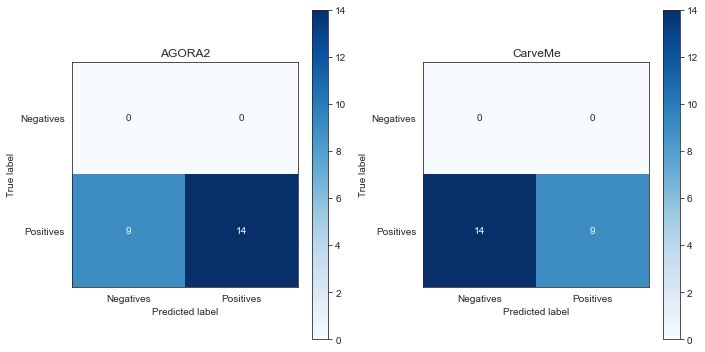

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# create four new columns for each condition (AGORA2_TP, AGORA2_FN, CarveMe_TP, CarveMe_FN)
# Convert 'TP' and 'FN' to model's predictions and actual labels
df['AGORA2_pred'] = df['AGORA2'].apply(lambda x: 1 if x == 'TP' else 0)
df['AGORA2_true'] = df['AGORA2'].apply(lambda x: 1)  # the secretion exists, so the true label is 1
df['CarveMe_pred'] = df['CarveMe'].apply(lambda x: 1 if x == 'TP' else 0)
df['CarveMe_true'] = df['CarveMe'].apply(lambda x: 1)  # the secretion exists, so the true label is 1

# Calculate confusion matrices
cm_agora = confusion_matrix(df['AGORA2_true'], df['AGORA2_pred'])
cm_carve = confusion_matrix(df['CarveMe_true'], df['CarveMe_pred'])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display confusion matrix for AGORA2
ConfusionMatrixDisplay(cm_agora, display_labels=['Negatives', 'Positives']).plot(values_format = 'd', cmap='Blues', ax=ax[0])
ax[0].set_title('AGORA2')

# Display confusion matrix for CarveMe
ConfusionMatrixDisplay(cm_carve, display_labels=['Negatives', 'Positives']).plot(values_format = 'd', cmap='Blues', ax=ax[1])
ax[1].set_title('CarveMe')

plt.tight_layout()
plt.savefig(r"results\carveme_vs_agora\confussion matrix Agora vs CarveMe.png", dpi=300, bbox_inches='tight')

### Now let's see if we can observe any cross-feeding 

For this we will first find a common defined minimal medium that allows growth of all the bacteria and see the end-preoduction products from all vhs models in the common minimal medium

In [17]:
organisms = ['F. nucleatum', 'G. morbillorum', 'P. gingivalis',
             'C. jejuni', 'P. stomatis']

vhs = {
    'F. nucleatum': r"data\\vhs models\\Fn_vhs.xml",
    'G. morbillorum': r"data\\vhs models\\Gm_vhs.xml",
    'P. gingivalis': r"data\\vhs models\\Pg_vhs.xml",
    'C. jejuni': r"data\\vhs models\\Cj_vhs.xml",
    'P. stomatis': r"data\\vhs models\\Ps_vhs.xml"
}

carveme = {
    'F. nucleatum': r"data\\carveme_models\\Fn_carveme.xml",
    'G. morbillorum': r"data\\carveme_models\\Gm_carveme.xml",
    'P. gingivalis': r"data\\carveme_models\\Pg_carveme.xml",
    'C. jejuni': r"data\\carveme_models\\Cj_carveme.xml",
    'P. stomatis': r"data\\carveme_models\\Ps_carveme.xml"
}
for label, model_file in vhs.items():
    vhs[label] =  cobra.io.read_sbml_model(model_file)

for label, model_file in carveme.items():
    carveme[label] =  cobra.io.read_sbml_model(model_file)

In [18]:
import cobra.medium as m
#Find minimal medium for every bacteria
minimal_medium={}
for bacteria in vhs.keys():
    minimal_medium[bacteria] = m.minimal_medium(vhs[bacteria],min_objective_value=0.8)


C:\Users\pau.perezescriva\Anaconda3\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\pau.perezescriva\Anaconda3\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\pau.perezescriva\Anaconda3\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\pau.perezescriva\Anaconda3\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' 

### Let's establish a common "minimal" medium for all bacteria

In [19]:
import pandas as pd

# Initialize an empty DataFrame to hold all minimal medium components
all_minimal_media = pd.DataFrame()

# Iterate over each minimal medium
for bacteria, medium in minimal_medium.items():
    # Convert the medium to a DataFrame and append to the main DataFrame
    all_minimal_media = all_minimal_media.append(medium.to_frame().transpose())

# Aggregate the components by taking the maximum value of each component
# (this is a conservative approach that ensures we have enough of each component for all bacteria)
combined_minimal_medium = all_minimal_media.max()

# Convert the combined medium back to a dictionary
combined_minimal_medium_dict = combined_minimal_medium.to_dict()


C:\Users\pau.perezescriva\AppData\Local\Temp\ipykernel_28108\2950509929.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_minimal_media = all_minimal_media.append(medium.to_frame().transpose())
C:\Users\pau.perezescriva\AppData\Local\Temp\ipykernel_28108\2950509929.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_minimal_media = all_minimal_media.append(medium.to_frame().transpose())
C:\Users\pau.perezescriva\AppData\Local\Temp\ipykernel_28108\2950509929.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_minimal_media = all_minimal_media.append(medium.to_frame().transpose())


### Establish common minimal medium for every bacteria
If the reaction is not in the bacteria model, it will be skipped

In [20]:
#set the  medium for all bacteria to be the common minimal medium medium
for bacteria in vhs.keys():
    # Get the model for the bacteria
    model = vhs[bacteria]

    # Get the exchange reactions for the model
    model_exchanges = [rxn.id for rxn in model.exchanges]

    # Filter the combined minimal medium to only include exchange reactions that are in the model
    filtered_minimal_medium = {rxn: val for rxn, val in combined_minimal_medium_dict.items() if rxn in model_exchanges}

    # Apply the filtered minimal medium to the model
    vhs[bacteria].medium = filtered_minimal_medium


### Now we will implemente the amino acid defined medium that has been shown to allow growth of F. nucleatum

In [21]:
# functions
def media_creator(media_df,seed_dict,model,use_estimated_uptake=True):
    
    complex_media_dict = {}
    met_ids=[seed_dict[k]+'[c]' for k in media_df.index]
    model_mets=[met.id for met in model.metabolites]
    
    for met in met_ids:
        if met in model_mets:
            met_obj = model.metabolites.get_by_id(met).copy()
            met_obj.id = met_obj.id[:-3]+'[e]'
            if use_estimated_uptake:
                met_index = met.split('[c]')[0]
                met_index=bigg_seed_dict[met_index]
                complex_media_dict[met_obj]=-1*media_df.loc[met_index,'estimated_uptake']
            else:
                complex_media_dict[met_obj] = -1000.0 # For now, assume -1000 instead of any values in the media file
    met_obj = model.metabolites.get_by_id('nh4[c]').copy()
    complex_media_dict[met_obj] = -1000
    return complex_media_dict

def set_media_from_minimal_media(model, media,minimal_medium, verbose=False):
    
    # Find and close all exchange reactions in the model
    model_rxns = [rxn.id for rxn in model.reactions]
    for rxn in model_rxns:
        if rxn.startswith('EX_') and rxn.endswith('(e)'):
            model.reactions.get_by_id(rxn).lower_bound = 0.0
    
    # Check for existence of exchange reactions for the media metabolites in the model
    for ex_r in minimal_medium.keys():
        model.reactions.get_by_id(ex_r).lower_bound= -minimal_medium[ex_r]
    for met in media.keys():
        if 'EX_'+met.id[:-3]+'(e)' in model_rxns:
            model.reactions.get_by_id('EX_'+met.id[:-3]+'(e)').lower_bound = media[met]
        else:
            # Create exchange reaction and add to model
            if verbose:
                print("added exchange rxn for " + met.name)
            new_exchange = cobra.Reaction('EX_'+met.id[:-3]+'(e)')
            new_exchange.name = met.name + ' exchange'
            new_exchange.add_metabolites({met:-1})
            new_exchange.lower_bound = media[met]
            new_exchange.upper_bound = 1000
            model.add_reactions([new_exchange])
            model.repair() 


Collect data and media file

In [22]:

data_dir = "data\\"
import cobra.medium as m
data_recon_metabolites = pd.read_csv(data_dir+'recon-store-metabolites-1.tsv',sep='\t')
seed_data = data_recon_metabolites.dropna(subset=['seed'])
seed_dict=dict(zip(seed_data['seed'],seed_data['abbreviation']))
bigg_seed_dict = dict(zip(seed_data['abbreviation'],seed_data['seed']))
media_name= 'defined_media_used3.xlsx'

media_file = os.path.join(data_dir,media_name)
xl = pd.ExcelFile(media_file)
media_data={}
for sheet in xl.sheet_names:
    media_data[sheet] = pd.read_excel(xl, sheet_name=sheet,index_col=0)
model_media_dict = {k: media_creator(v, seed_dict, model) for k, v in media_data.items()}


In [23]:
#Apply amino acid media to all bacteria and see metabolties produced
#We will eliminate the carbon sources and O2 to make sure it is representative of an anaerobic amino acid media.


In [35]:
# For every bacteria set the AA media

reactions_to_turn_off = ['EX_fru(e)','EX_acgam(e)','EX_fru(e)','EX_malt(e)','EX_o2(e)']

for bacteria in vhs.keys():
    # Get the model for the bacteria
    set_media_from_minimal_media(vhs[bacteria],model_media_dict["AA"],vhs[bacteria].medium)
    for reaction in reactions_to_turn_off:
        try:
            vhs[bacteria].reactions.get_by_id(reaction).lower_bound = 0
        except:
            pass

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_metabolite_from_reaction(reaction):
    # Split the reaction string on underscores and extract the second part
    metabolite = reaction.split('_')[1]
    return metabolite

# 1. Collect consumption and production data
metabolite_fluxes = {}

for bacteria, model in vhs.items():
    # Run the model and get the fluxes of the exchange reactions
    solution = model.optimize()
    fluxes = solution.fluxes
    
    # Filter the fluxes to only include exchange reactions
    ex_fluxes = {rxn: flux for rxn, flux in fluxes.items() if rxn.startswith("EX_")}
    
    # Determine which metabolites are consumed and produced
    consumed = [get_metabolite_from_reaction(rxn) for rxn, flux in ex_fluxes.items() if flux < 0]
    produced = [get_metabolite_from_reaction(rxn) for rxn, flux in ex_fluxes.items() if flux > 0]
    
    metabolite_fluxes[bacteria] = {"consumed": consumed, "produced": produced}

# 2. Create a matrix of metabolites and models
data = {}

for bacteria, fluxes in metabolite_fluxes.items():
    for metabolite in fluxes["consumed"]:
        if metabolite not in data:
            data[metabolite] = {}
        data[metabolite][bacteria] = -1  # Negative for consumed metabolites
    
    for metabolite in fluxes["produced"]:
        if metabolite not in data:
            data[metabolite] = {}
        data[metabolite][bacteria] = 1  # Positive for produced metabolites

df = pd.DataFrame(data).transpose().fillna(0)




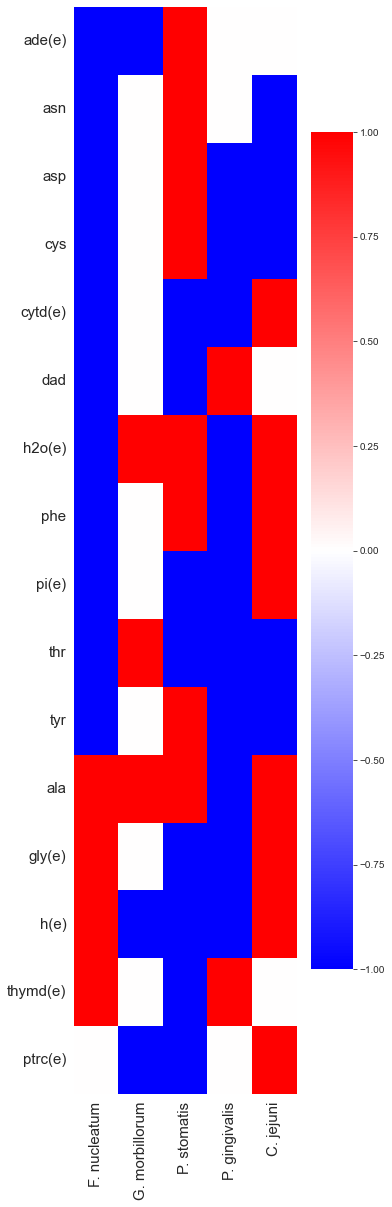

In [45]:
# Filter the DataFrame to include only rows with at least one positive and one negative value
df_filtered = df[(df.T > 0).any() & (df.T < 0).any()]

# Set a large figure size
plt.figure(figsize=(5, 20))

# Create the heatmap
sns.heatmap(df_filtered, cmap="bwr", center=0)

# Rotate y-labels and increase their size
plt.yticks(rotation=0)
plt.tick_params(axis='y', which='major', labelsize=15)  # Increase font size
plt.tick_params(axis='x', which='major', labelsize=15)  # Increase font size

# Save the figure to a high-quality png file
plt.savefig('results/cross-feeding/cross-feeding_FF.png', dpi=300)


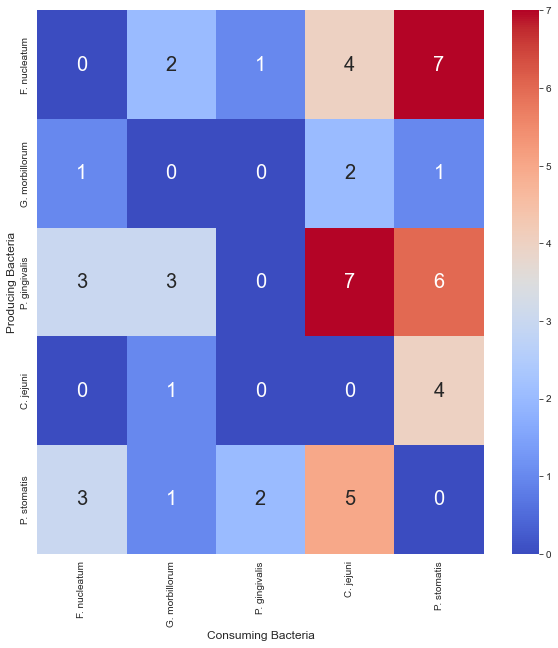

In [41]:
# Create a dictionary to store the data
data = {bacteria: {} for bacteria in vhs.keys()}

# Go through each pair of bacteria
for bacteria1 in vhs.keys():
    for bacteria2 in vhs.keys():
        # Get the metabolites produced by bacteria1 and consumed by bacteria2
        produced = set(metabolite_fluxes[bacteria1]["produced"])
        consumed = set(metabolite_fluxes[bacteria2]["consumed"])
        
        # Count the number of metabolites produced by bacteria1 and consumed by bacteria2
        count = len(produced & consumed)
        
        # Store the count in the data dictionary
        data[bacteria1][bacteria2] = count

# Convert the data dictionary to a DataFrame
df = pd.DataFrame(data)

# Set a smaller figure size
fig, ax = plt.subplots(figsize=(10, 10))

# Create the heatmap
sns.heatmap(df, cmap="coolwarm", annot=True, annot_kws={"size": 20}, fmt="d")

# Set the x and y labels and increase their font size
ax.set_xlabel('Consuming Bacteria', fontsize=12)
ax.set_ylabel('Producing Bacteria', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Save the figure to a high-quality png file
plt.savefig('results/cross-feeding/cross-feeding_FF_numbers.png', dpi=300)

In [241]:
os.getcwd()

'Z:\\Post Doc\\PPE\\2HB\\Modelling'

In [251]:
import matplotlib
import sklearn

print(cobra.__version__,pd.__version__,matplotlib.__version__,sklearn.__version__,sns.__version__)

0.26.2 1.4.2 3.5.1 1.0.2 0.11.2
